# Time Series Forecasting with Long Short-Term Memory (LSTM) Networks

## Financial Forecasting and Demand Prediction using LSTMs and Attention Mechanisms


**Project Overview**: 
The project aims to forecast (predict) future values based on past data using a type of deep learning model called Long Short-Term Memory (LSTM) networks. Specifically, it focuses on two types of forecasts:
- Financial Forecasting (e.g., predicting stock prices for a company).
- Demand Prediction (e.g., predicting how much product a company will sell in the future).

Both of these problems involve time series data, which means the data is sequential (ordered in time), like stock prices over days or product demand over months.

**Key Techniques**:
- LSTM and GRU Networks
- Attention Mechanisms
- Model Ensembling
- Hyperparameter Tuning
- Real-Time Prediction Deployment

**Goals of the Project**: 

1. Financial Forecasting (Stock Price Prediction):
The project’s first goal is to build a model that can predict a Walmart’s stock price in the future (e.g., predict tomorrow's stock price based on the past few days).

Input Data: Historical stock prices.
Model: LSTM network that learns the relationship between previous stock prices and future stock prices.
Output: The predicted stock price for the next day(s).

2. Demand Prediction (Product Sales Forecasting):
The second goal is to build a model that can predict future demand for products, such as how much a store will sell in the upcoming week or month.

Input Data: Historical sales data for a product (using economic indicators like CPI, Fuel Price, and others).
Model: LSTM network that learns how sales fluctuate over time (seasonality, trends, promotions).
Output: The predicted demand for the product in the next period (e.g., next week or next month).


##### The idea is to build advanced models (i.e., LSTM for time series) and potentially merge these two tasks to create a comprehensive model that uses both financial and demand data.

## Dataset Selection

We will use 2 types of data set for Walmart:
1. For stock price prediction from yfinance
2. For demand prediction from Kaggle - https://www.kaggle.com/code/yasserh/walmart-sales-prediction-best-ml-algorithms/input?select=Walmart.csv

###  Stock Forecasting Data Description:

**Date**: The specific day for which the stock data is recorded (Trading Day). 

**Open**: The price of the stock when the market opened on that particular day.

**High**: The highest price the stock reached during the trading day. 

**Low**: The lowest price the stock reached during the trading day.

**Close**: The price of the stock when the market closed on that particular day.

**Adj Close**: The closing price adjusted for corporate actions such as stock splits, dividends, or new stock issuances.

**Volume**: The number of shares that were traded during the trading day.


In [22]:
#!pip install yfinance
#!pip install pandas

In [130]:
# Load stock data
walmart_stock_data = yf.download('WMT', start='2015-01-01', end='2023-12-31')

[*********************100%***********************]  1 of 1 completed


In [131]:
walmart_stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,28.756666,28.906668,28.516666,28.633333,23.493431,13505400
2015-01-05,28.573334,28.773333,28.503332,28.549999,23.425051,20937000
2015-01-06,28.660000,28.916668,28.596666,28.770000,23.605558,24615300
2015-01-07,28.926666,29.559999,28.889999,29.533333,24.231869,25495200
2015-01-08,29.736668,30.223333,29.690001,30.156668,24.743309,38140800


In [271]:
# Perform Augmented Dickey-Fuller test
result = adfuller(walmart_stock_data.Close.dropna())

# Print the ADF statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Number of lags used:', (result[2]))
print('Number of observations:', (result[3]))

ADF Statistic: -0.5645936695206716
p-value: 0.8787834059525352
Number of lags used: 9
Number of observations: 2254


The p-value is quite high (0.8788 > 0.05), you fail to reject the null hypothesis, meaning the time series is **non-stationary**.



In [274]:
# Perform Augmented Dickey-Fuller test
result = adfuller(walmart_stock_data['Adj Close'].dropna())

# Print the ADF statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Number of lags used:', (result[2]))
print('Number of observations:', (result[3]))

ADF Statistic: -0.3749371845894241
p-value: 0.9142000203424617
Number of lags used: 9
Number of observations: 2254


The p-value is quite high (0.8788 > 0.05), you fail to reject the null hypothesis, meaning the time series is **non-stationary**.



Thus, the Stock Price data for Walmart is **non-stationary**. We will look into this later when required.



### Demand Prediction Data Description:

**Store**: The store number

**Date**: The week of sales

**Weekly_Sales**:  Sales for the given store

**Holiday_Flag**: Whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

**Temperature**: Temperature on the day of sale

**Fuel_Price**: Cost of fuel in the region

**CPI**: Prevailing consumer price index

**Unemployment**: Prevailing unemployment rate

In [348]:
# Load sales data

import pandas as pd
walmart_sales_data = pd.read_csv('/Volumes/Personal Drive/GitHub/Walmart_Stock Price Forecasting and Demand Prediction/Walmart.csv')

In [349]:
walmart_sales_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [350]:
# Check the column names in walmart_sales_data
print(walmart_sales_data.columns)


Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


In [134]:
#!pip install statsmodels pandas matplotlib

In [351]:
# Perform Augmented Dickey-Fuller test
result = adfuller(walmart_sales_data.Weekly_Sales.dropna())

# Print the ADF statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Number of lags used:', (result[2]))
print('Number of observations:', (result[3]))


ADF Statistic: -4.624149498578287
p-value: 0.00011655869699902064
Number of lags used: 34
Number of observations: 6400


The p-value is much smaller than the typical threshold of 0.05 (in this case, it's 0.000116), we can reject the null hypothesis. This means:

- The weekly sales data does not have a unit root.
- The time series is **stationary**.

In [270]:
# Perform Augmented Dickey-Fuller test
result = adfuller(walmart_sales_data.Fuel_Price.dropna())

# Print the ADF statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Number of lags used:', (result[2]))
print('Number of observations:', (result[3]))

ADF Statistic: -14.336549359802433
p-value: 1.077635317026596e-26
Number of lags used: 33
Number of observations: 6401


The p-value for fuel price is far smaller than any typical significance level (such as 0.05 or 0.01), you strongly reject the null hypothesis. This means the fuel price time series is **stationary**

In [352]:
# Convert the Date column to datetime format with dayfirst=True
#walmart_sales_data['Date'] = pd.to_datetime(walmart_sales_data['Date'], dayfirst=True)
walmart_sales_data['Date'] = pd.to_datetime(walmart_sales_data['Date'], format='%d-%m-%Y')
# Set the Date as the index
#walmart_sales_data.set_index('Date', inplace=True)



In [353]:
# Check if the conversion worked
walmart_sales_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


Since your stock data is from 2015 to 2023 and the sales data is from 2010 to 2012, there is a time mismatch between the two datasets, which makes it difficult to directly combine them.

We will use (give a try) **Extrapolate Sales**: Try forecasting sales data beyond 2012 using **ARIMA** or similar models.


To extrapolate sales data beyond 2012 using **ARIMA (AutoRegressive Integrated Moving Average)**, the goal is to predict future sales based on historical trends, allowing you to extend your sales dataset beyond the available 2010–2012 range.

In [43]:
#!pip install statsmodels pandas matplotlib #---for time series forecasting and matplotlib for visualization

In [354]:
# Focus on Weekly_Sales and aggregate by date if necessary
weekly_sales = walmart_sales_data['Weekly_Sales']
#weekly_sales

Visualize the Sales Data:
Before building the model, it’s useful to visualize the data to understand the trends.

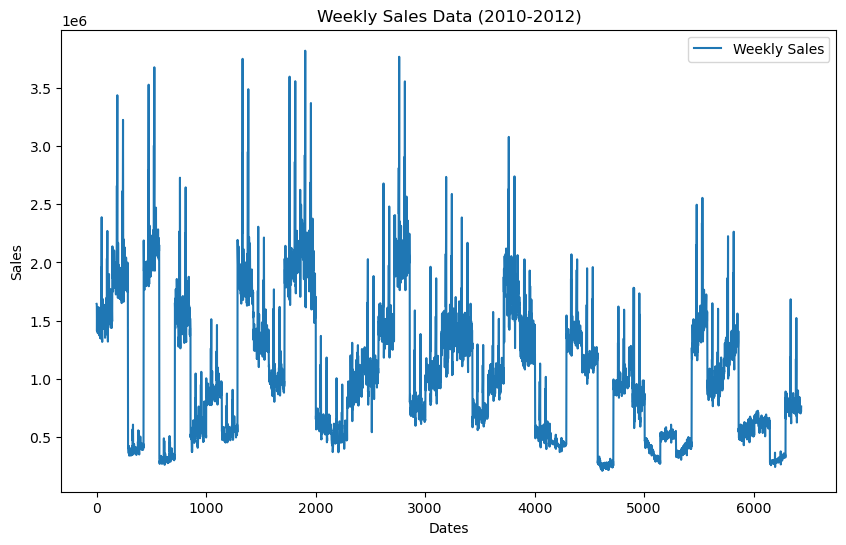

In [303]:
import matplotlib.pyplot as plt

# plot the weekly sales data
plt.figure(figsize=(10,6))
plt.plot(weekly_sales, label = 'Weekly Sales')
plt.title('Weekly Sales Data (2010-2012)')
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.legend()
plt.show()
          

In [355]:
# Aggregate sales data by date (sum sales across all stores)
walmart_sales_agg = walmart_sales_data.groupby('Date')['Weekly_Sales'].sum()

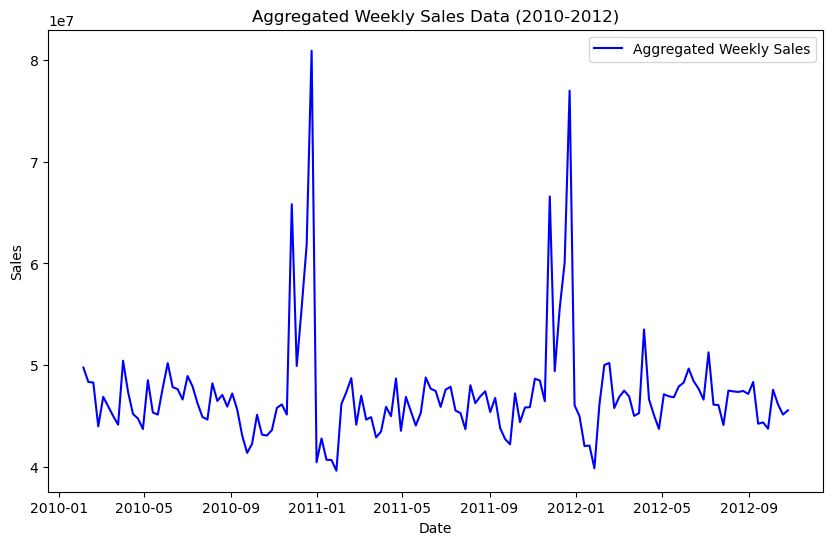

In [356]:
# plot the weekly sales data
plt.figure(figsize=(10,6))
plt.plot(walmart_sales_agg, label='Aggregated Weekly Sales', color ='blue')
plt.title('Aggregated Weekly Sales Data (2010-2012)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

Why This Graph is Helpful:

- Overall Trend: It gives you a single line representing the total sales across all stores, which allows ARIMA to capture overall trends in Walmart's sales.
- Easier for Time Series Forecasting: Aggregating sales across all stores smooths out some of the noise that might exist when looking at individual stores, making the data more stable and suitable for ARIMA forecasting.
- Consistent Time Series: ARIMA assumes a consistent, stationary time series, so an aggregated and smoothed dataset (as opposed to one with many individual store fluctuations) will be easier to work with.

In [357]:
# Check if the conversion worked
walmart_sales_agg.head()

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
Name: Weekly_Sales, dtype: float64

### ARIMA Model

The ARIMA model is designed for time series forecasting and can help predict future values based on historical data. We will fit the ARIMA model to your sales data and forecast sales for the years beyond 2012.

**Step 1**: Check Stationarity of the Time Series

The ARIMA model requires the time series to be stationary (i.e., **constant mean and variance over time**). You can check the stationarity of the data by using the **Augmented Dickey-Fuller (ADF) Test**.

Augmented Dickey-Fuller (ADF) Test: This is a hypothesis test where:

The null hypothesis (H₀) is that the time series has a unit root, meaning it is non-stationary.
The alternative hypothesis (H₁) is that the time series is stationary (i.e., it does not have a unit root).

*Note*: <br>
- p-value < 0.05 (typically): Reject the null hypothesis. This means the series is stationary and can be modeled directly with ARIMA.
- p-value ≥ 0.05: Fail to reject the null hypothesis. This suggests that the series is non-stationary, and differencing might be required to make it stationary.

In [358]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(walmart_sales_agg)

# Print the ADF statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Number of lags used:', (result[2]))
print('Number of observations:', (result[3]))

# Print the critical values for different significance levels
#print('Critical Values:', result[4])

# Compare the ADF statistic with critical values
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')

# Check if the ADF statistic is less than the critical value at 5%
if result[0] < result[4]['5%']:
    print('The time series is stationary (based on the 5% critical value).')
else:
    print('The time series is not stationary (based on the 5% critical value).')


ADF Statistic: -5.90829795718633
p-value: 2.6759791589860825e-07
Number of lags used: 4
Number of observations: 138
Critical Value (1%): -3.47864788917503
Critical Value (5%): -2.882721765644168
Critical Value (10%): -2.578065326612056
The time series is stationary (based on the 5% critical value).


Explanation of Output:
- ADF Statistic: A numerical value that quantifies the test.
- p-value: Probability of the null hypothesis being true.
- Critical Values: Thresholds at different significance levels (1%, 5%, and 10%) that help interpret the ADF statistic.

*Note*: The 5% critical value is commonly used in hypothesis testing because it corresponds to a 95% confidence level, which is a widely accepted standard for determining statistical significance.


**Observation**: The time-series is **Stationary**.


***Important***:
If the time series is not stationary:

We can difference the time series (i.e., subtract the current value from the previous value) to make it stationary.

*sales_diff = sales_agg.diff().dropna()*

**Fit the ARIMA Model**:

In [309]:
## FROM GPT 4:

from statsmodels.tsa.arima.model import ARIMA
# Fit the ARIMA model with the specified order (ARIMA(1, 0, 1))
model = ARIMA(walmart_sales_agg, order=(0, 0, 1))
model_fit = model.fit()

# Print the summary of the model fit
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -2414.092
Date:                Sun, 13 Oct 2024   AIC                           4834.184
Time:                        23:15:06   BIC                           4843.072
Sample:                    02-05-2010   HQIC                          4837.795
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.711e+07   6.89e+05     68.365      0.000    4.58e+07    4.85e+07
ma.L1          0.2472      0.055      4.514      0.000       0.140       0.355
sigma2      2.774e+13      0.262   1.06e+14      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


Diagnostics:
- Ljung-Box Test (Q = 0.01, p-value = 0.92): This indicates that the residuals are not autocorrelated, which is a good sign.
- Jarque-Bera Test (p-value = 0.00): This suggests that the residuals are not normally distributed, which could be due to outliers or skewness in the data.
- High Kurtosis (15.96) and High Skew (2.55): This indicates that the residuals are not behaving as expected and are highly skewed with heavy tails.

In [360]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model (ensure correct p, d, q values)
model = ARIMA(walmart_sales_agg, order=(0, 0, 1)) ## NOT FIT FOR OUR DATASET ##
model_fit = model.fit()

# Check the summary of the model
print(model_fit.summary())



                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -2414.092
Date:                Mon, 14 Oct 2024   AIC                           4834.184
Time:                        01:25:52   BIC                           4843.072
Sample:                    02-05-2010   HQIC                          4837.795
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.711e+07   6.89e+05     68.365      0.000    4.58e+07    4.85e+07
ma.L1          0.2472      0.055      4.514      0.000       0.140       0.355
sigma2      2.774e+13      0.262   1.06e+14      0.0

**Warnings Analysis**

Note:

Warning 1: "Covariance matrix calculated using the outer product of gradients (complex-step)" – This is generally not a serious issue and simply refers to the method used to estimate the covariance matrix. It's a technical detail in the model fitting process, and unless it’s accompanied by further problems, it can often be ignored.

Warning 2: "Covariance matrix is singular or near-singular" – This is more serious. A singular covariance matrix suggests that the model is overfitting or that there are issues with multicollinearity (i.e., high correlation between the AR/MA components) or lack of enough data variability to estimate the parameters properly. This can lead to unstable standard errors and unreliable forecasts.

- *Covariance matrix warnings*:

This warning suggests that there may be **multicollinearity or redundancy in the model parameters** (i.e., insufficient variation in the data), which is leading to a poorly estimated covariance matrix.
The covariance matrix being singular implies that the model is not able to properly estimate the variances of the residuals, leading to instability.

- *Standard Errors May Be Unstable*:

This is a follow-up warning that suggests the parameter estimates might not be reliable due to the issues with the covariance matrix.

- *ValueWarning* - No frequency information was provided, so inferred frequency W-FRI will be used:

This warning means that the time series did not have a specific frequency defined, so statsmodels inferred that the data follows a weekly frequency ending on Fridays (W-FRI). This is likely correct for our data, which is weekly sales, but we can explicitly define the frequency to avoid this warning.

1. Resolve Frequency Issue:
Avoid the frequency warning by explicitly setting the frequency of your time series data when you convert the Date column to datetime format and set it as the index

In [285]:
walmart_sales_agg.index = pd.to_datetime(walmart_sales_agg.index)  # Ensure index is DateTime


In [287]:
# Check the frequency of the dates before setting the new frequency
print(walmart_sales_agg.index.freq)


None


In [288]:
# Check for missing values in the dataset
print(walmart_sales_agg.isnull().sum())

0


In [359]:
# Resample the data to weekly Fridays ('W-FRI'), summing up sales for each week
walmart_sales_agg = walmart_sales_agg.resample('W-FRI').sum()


# Fill any missing values with forward fill or backward fill (if necessary)
# walmart_sales_agg = walmart_sales_agg.ffill().bfill()

# Check the output and ensure no NaN values
print(walmart_sales_agg.isnull().sum())


0


***Rerun the ARIMA model fit from above to confirm if the frequency issue is gone.***

In [361]:
forecast = model_fit.forecast(steps=10)  # Forecasting 10 time steps ahead
print(forecast)

2012-11-02    4.682792e+07
2012-11-09    4.711342e+07
2012-11-16    4.711342e+07
2012-11-23    4.711342e+07
2012-11-30    4.711342e+07
2012-12-07    4.711342e+07
2012-12-14    4.711342e+07
2012-12-21    4.711342e+07
2012-12-28    4.711342e+07
2013-01-04    4.711342e+07
Freq: W-FRI, Name: predicted_mean, dtype: float64


2. Handling the Covariance Matrix Issue: 
The covariance matrix issue is likely due to an ill-specified ARIMA model.

As mentioned earlier, the current order (1, 1, 1) might not be suitable for our data. We will use auto_arima to automatically determine the best parameters.

In [111]:
#!pip install pmdarima

In [263]:
from pmdarima import auto_arima

# Automatically find the best ARIMA parameters
auto_arima_model = auto_arima(walmart_sales_agg, seasonal=False, trace=True, stepwise=False)

# Print the summary of the best model found
print(auto_arima_model.summary())


# Fit the model
model_fit = auto_arima_model.fit(walmart_sales_agg)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5462.768, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5370.491, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=5343.635, Time=0.01 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=5340.791, Time=0.02 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=5338.627, Time=0.02 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=5338.603, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4853.809, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4855.994, Time=0.03 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf

## SARIMA Model

In [314]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define and fit SARIMA model with seasonal order
# Adjust p, d, q and P, D, Q, S based on seasonality
model = SARIMAX(walmart_sales_agg, 
                order=(1, 0, 1),  # Non-seasonal part (adjust as needed)
                seasonal_order=(1, 1, 1, 12))  # Seasonal part with annual seasonality (S=52)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.58345D+01    |proj g|=  3.90542D-01

At iterate    5    f=  1.57384D+01    |proj g|=  2.40493D-02

At iterate   10    f=  1.57323D+01    |proj g|=  8.76391D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     14      1     0     0   5.856D-05   1.573D+01
  F =   15.732277615004502     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Results                  

 This problem is unconstrained.


Even with SARIMA it's not working. 

#### Let's investigate the data for outliers.

#### Z Score Method

In [362]:
# Calculate Z-scores
z_scores = np.abs((walmart_sales_agg - walmart_sales_agg.mean()) / walmart_sales_agg.std())

# Detect outliers (e.g., Z-score > 3)
outliers_z = walmart_sales_agg[z_scores > 3]

print("Outliers:\n", outliers)

Outliers:
 Date
2010-11-26    65821003.24
2010-12-10    55666770.39
2010-12-17    61820799.85
2010-12-24    80931415.60
2010-12-31    40432519.00
2011-01-28    39599852.99
2011-11-25    66593605.26
2011-12-09    55561147.70
2011-12-16    60085695.94
2011-12-23    76998241.31
2012-01-27    39834974.67
2012-04-06    53502315.87
Name: Weekly_Sales, dtype: float64


#### IQR Score Method

In [363]:
# Calculate the first and third quartile
Q1 = walmart_sales_agg.quantile(0.25)
Q3 = walmart_sales_agg.quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold
outlier_threshold = 1.5 * IQR

# Identify outliers
outliers_IQR = walmart_sales_agg[(walmart_sales_agg < (Q1 - outlier_threshold)) | (walmart_sales_agg > (Q3 + outlier_threshold))]
print("Outliers:\n", outliers)


Outliers:
 Date
2010-11-26    65821003.24
2010-12-10    55666770.39
2010-12-17    61820799.85
2010-12-24    80931415.60
2010-12-31    40432519.00
2011-01-28    39599852.99
2011-11-25    66593605.26
2011-12-09    55561147.70
2011-12-16    60085695.94
2011-12-23    76998241.31
2012-01-27    39834974.67
2012-04-06    53502315.87
Name: Weekly_Sales, dtype: float64


Cleary, we will go for IQR method since out dataset is not normally distributed

#### Handling Outliers

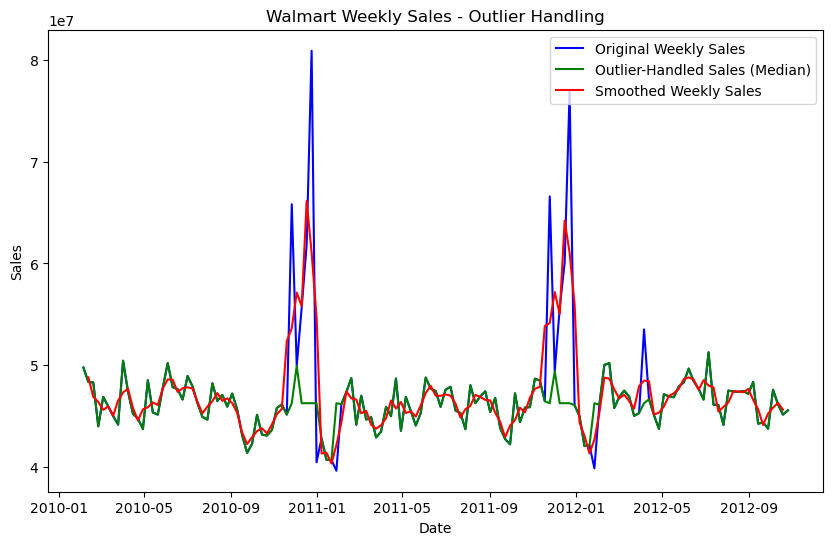

In [364]:
# Replace outliers with the median of the dataset
median_value = walmart_sales_agg.median()
cleaned_data = walmart_sales_agg.where(~walmart_sales_agg.isin(outliers_IQR), median_value)

# Alternatively, apply a rolling average (smoothing)
smoothed_data = walmart_sales_agg.rolling(window=3, center=True).mean()

# Plot the original and cleaned/smoothed data to compare
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(walmart_sales_agg, label='Original Weekly Sales', color='blue')
plt.plot(cleaned_data, label='Outlier-Handled Sales (Median)', color='green')
plt.plot(smoothed_data, label='Smoothed Weekly Sales', color='red')
plt.title('Walmart Weekly Sales - Outlier Handling')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


#### Outlier Detection in Residuals:
After fitting a model (e.g., ARIMA/SARIMA), inspect the residuals for outliers. Large residuals might indicate outliers that the model did not capture.

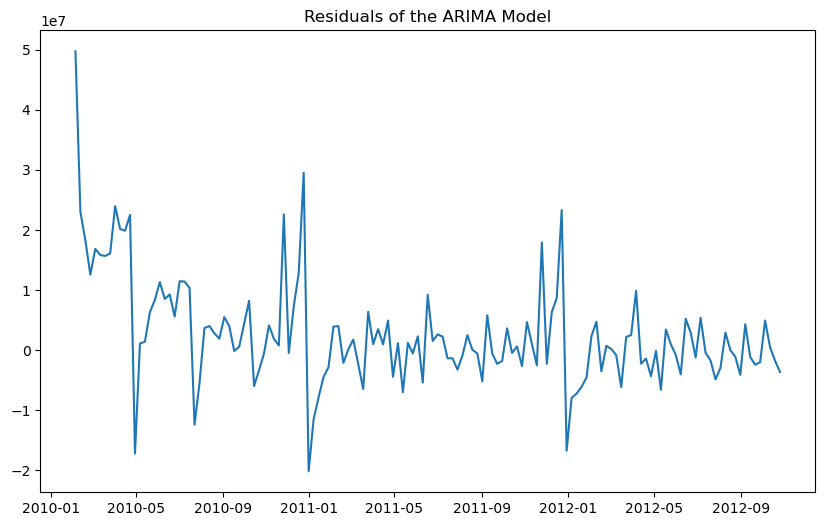

Outliers in Residuals:
 Date
2010-02-05    49750740.5
Freq: W-FRI, dtype: float64


In [324]:
# Fit ARIMA model (example) and get residuals
#model_fit = ARIMA(walmart_sales_agg, order=(1, 0, 1)).fit()
residuals = model_fit.resid

# Plot residuals to identify outliers
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of the ARIMA Model')
plt.show()

# Identify outliers in residuals (Z-scores > 3)
residual_z_scores = np.abs((residuals - residuals.mean()) / residuals.std())
residual_outliers = residuals[residual_z_scores > 3]
print("Outliers in Residuals:\n", residual_outliers)


### --------

### ARIMA with cleaned data

In [373]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model (ensure correct p, d, q values)
model = ARIMA(smoothed_data, order=(1, 0, 1)) ## NOT FIT FOR OUR DATASET ##
model_fit = model.fit()

# Check the summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2266.809
Date:                Mon, 14 Oct 2024   AIC                           4541.617
Time:                        01:34:56   BIC                           4553.469
Sample:                    02-05-2010   HQIC                          4546.433
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.711e+07   2.24e-09    2.1e+16      0.000    4.71e+07    4.71e+07
ar.L1          0.7505      0.035     21.229      0.000       0.681       0.820
ma.L1          0.1643      0.127      1.297      0.1

In [372]:
# Forecast the next 12 periods (or any number of periods)
forecast_steps = 12
forecast_cleaned = model_cleaned_fit.forecast(steps=forecast_steps)

# Create a date range for the forecasted values (extend beyond the last date in cleaned data)
future_dates = pd.date_range(start=cleaned_data.index[-1], periods=forecast_steps + 1, freq='W')[1:]

# Create a DataFrame for the forecasted sales
forecasted_sales = pd.DataFrame(forecast_cleaned, index=future_dates, columns=['Forecasted_Weekly_Sales'])

# Display the forecasted sales
print(forecasted_sales)


           Forecasted_Weekly_Sales
2012-11-04                     NaN
2012-11-11                     NaN
2012-11-18                     NaN
2012-11-25                     NaN
2012-12-02                     NaN
2012-12-09                     NaN
2012-12-16                     NaN
2012-12-23                     NaN
2012-12-30                     NaN
2013-01-06                     NaN
2013-01-13                     NaN
2013-01-20                     NaN


## LOOK FROM HERE AFTER THE MODEL FITS PROPERLY

In [242]:
# Forecast the next 572 weeks (11 years)
forecast_steps = 572
forecast = model_fit.predict(n_periods=forecast_steps)

# Create a date range for the forecasted values
future_dates = pd.date_range(start='2013-01-01', periods=forecast_steps, freq='W')

# Create a DataFrame for the forecasted sales
forecasted_sales = pd.DataFrame(forecast, index=future_dates, columns=['Forecasted_Weekly_Sales'])

# Display the first few forecasted sales
print(forecasted_sales.head())


           Forecasted_Weekly_Sales
2013-01-06                     NaN
2013-01-13                     NaN
2013-01-20                     NaN
2013-01-27                     NaN
2013-02-03                     NaN


In [289]:
# Forecast the next 572 weeks (11 years)
forecast_steps = 10
forecast = model_fit.forecast(steps= forecast_steps)

# Create a date range for the forecasted values
future_dates = pd.date_range(start= walmart_sales_agg.index[-1] + pd.Timedelta(weeks=1), periods=forecast_steps, freq='W')

# Create a DataFrame for the forecasted sales
forecasted_sales = pd.DataFrame(forecast, index=future_dates, columns=['Forecasted_Weekly_Sales'])

# Display the first few forecasted sales
print(forecasted_sales.head())


           Forecasted_Weekly_Sales
2012-11-04                     NaN
2012-11-11                     NaN
2012-11-18                     NaN
2012-11-25                     NaN
2012-12-02                     NaN


In [378]:
# Load sales data

import pandas as pd
walmart_sales_data = pd.read_csv('/Volumes/Personal Drive/GitHub/Walmart_Stock Price Forecasting and Demand Prediction/Walmart.csv')


# Preprocessing sales data
walmart_sales_data['Date'] = pd.to_datetime(walmart_sales_data['Date'], dayfirst=True, errors='coerce')
walmart_sales_data.dropna(subset=['Date'], inplace=True)
walmart_sales_data.set_index('Date', inplace=True)

# Ensure the index is a DatetimeIndex for resampling
if not isinstance(walmart_sales_data.index, pd.DatetimeIndex):
    walmart_sales_data.index = pd.to_datetime(walmart_sales_data.index)

# ARIMA model to extrapolate sales data beyond 2012
sales_data = walmart_sales_data['Weekly_Sales'].resample('W').sum()
train_data = sales_data[sales_data.index <= '2012-12-31']

# Fit ARIMA model
arima_model = ARIMA(train_data, order=(5, 1, 0))
arima_model_fit = arima_model.fit()



In [385]:
# Forecast future sales (till 2023)
sales_forecast = sales_forecast.fillna(0)  # Fill NaN values with 0 to handle missing data
dates = pd.date_range(start='2013-01-06', periods=len(sales_forecast), freq='W')
forecasted_sales = pd.DataFrame({'Date': dates, 'Forecasted_Weekly_Sales': sales_forecast})
forecasted_sales.set_index('Date', inplace=True)

# Display the first few forecasted sales
print(forecasted_sales_seasonal.tail())

            Forecasted_Weekly_Sales
2023-09-17                      NaN
2023-09-24                      NaN
2023-10-01                      NaN
2023-10-08                      NaN
2023-10-15                      NaN


In [203]:
model_sarima = auto_arima(walmart_sales_agg, seasonal=True, m=52, trace=True, stepwise=True)

# Forecast the next 572 weeks with seasonality
forecast_seasonal = model_sarima.predict(n_periods=forecast_steps)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=4769.760, Time=3.95 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=4844.691, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=4804.381, Time=0.56 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=4797.927, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=5462.768, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[52] intercept   : AIC=inf, Time=1.88 sec
 ARIMA(2,0,2)(1,0,0)[52] intercept   : AIC=4767.813, Time=2.20 sec
 ARIMA(2,0,2)(0,0,0)[52] intercept   : AIC=4830.548, Time=0.09 sec
 ARIMA(2,0,2)(2,0,0)[52] intercept   : AIC=4769.801, Time=13.76 sec
 ARIMA(2,0,2)(2,0,1)[52] intercept   : AIC=4773.390, Time=17.75 sec
 ARIMA(1,0,2)(1,0,0)[52] intercept   : AIC=4777.852, Time=1.68 sec
 ARIMA(2,0,1)(1,0,0)[52] intercept   : AIC=4779.475, Time=2.16 sec
 ARIMA(3,0,2)(1,0,0)[52] intercept   : AIC=4769.157, Time=2.95 sec
 ARIMA(2,0,3)(1,0,0)[52] intercept   : AIC=4779.845, Time=2.25 sec
 ARIMA(1,0,1)(1,0,0)[5

**Key Findings**:
Best Model: The model selected by auto_arima is ARIMA(2,0,2)(1,0,0)[52] intercept. This model includes:
- 2 autoregressive (AR) terms
- 2 moving average (MA) terms
- A seasonal component (1 seasonal AR term with a seasonality period of 52 weeks)
- Intercept term<br>

AIC: The model has an AIC (*Akaike Information Criterion*) of 4767.813, which is used to compare different models. Lower AIC values indicate a better fit.<br>

Next Steps:<br>
Now that the model has been selected, you can proceed with generating forecasts for the next 572 weeks (11 years). Here's how to forecast and visualize the results:

**Make Predictions for Sales Beyond 2012**


In [205]:
# Forecast the next 572 weeks (11 years)
forecast_steps = 572
forecast_seasonal = model_sarima.predict(n_periods=forecast_steps)


In [216]:
# Create a date range for the forecasted values (weekly frequency)
future_dates = pd.date_range(start= walmart_sales_agg.index[-1] + pd.Timedelta(weeks=1), periods=forecast_steps, freq='W')

print(future_dates)

DatetimeIndex(['2012-11-04', '2012-11-11', '2012-11-18', '2012-11-25',
               '2012-12-02', '2012-12-09', '2012-12-16', '2012-12-23',
               '2012-12-30', '2013-01-06',
               ...
               '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03',
               '2023-09-10', '2023-09-17', '2023-09-24', '2023-10-01',
               '2023-10-08', '2023-10-15'],
              dtype='datetime64[ns]', length=572, freq='W-SUN')


In [217]:
# Create a DataFrame for the forecasted sales
forecasted_sales_seasonal = pd.DataFrame(forecast_seasonal, index=future_dates, columns=['Forecasted_Weekly_Sales'])

# Display the first few forecasted sales
print(forecasted_sales_seasonal.head())


            Forecasted_Weekly_Sales
2012-11-04                      NaN
2012-11-11                      NaN
2012-11-18                      NaN
2012-11-25                      NaN
2012-12-02                      NaN


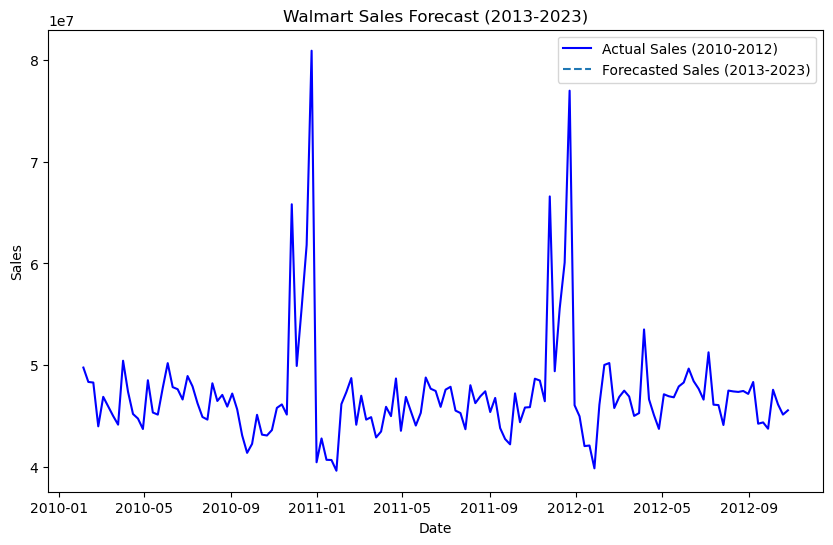

In [177]:
# Plot the forecasted sales along with the actual sales
plt.figure(figsize=(10,6))
plt.plot(walmart_sales_agg, label='Actual Sales (2010-2012)', color='blue')
plt.plot(forecasted_sales, label='Forecasted Sales (2013-2023)', linestyle='--')
plt.title('Walmart Sales Forecast (2013-2023)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

0
Performing stepwise search to minimize aic


/var/folders/qv/gh2d3t7x7xqgkvbl149fblxr0000gn/T/ipykernel_82177/107779032.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  walmart_sales_agg = walmart_sales_agg.fillna(method='ffill')  # Fill missing values


 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=-347.303, Time=5.61 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=-252.388, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=-301.656, Time=2.53 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=inf, Time=1.97 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=1229.057, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[52] intercept   : AIC=inf, Time=4.69 sec
 ARIMA(2,0,2)(1,0,0)[52] intercept   : AIC=-315.733, Time=3.93 sec
 ARIMA(2,0,2)(2,0,1)[52] intercept   : AIC=-359.927, Time=50.43 sec
 ARIMA(2,0,2)(2,0,0)[52] intercept   : AIC=-333.869, Time=23.85 sec
 ARIMA(2,0,2)(2,0,2)[52] intercept   : AIC=-360.342, Time=70.71 sec
 ARIMA(2,0,2)(1,0,2)[52] intercept   : AIC=-362.336, Time=47.46 sec
 ARIMA(2,0,2)(0,0,2)[52] intercept   : AIC=inf, Time=22.99 sec
 ARIMA(1,0,2)(1,0,2)[52] intercept   : AIC=inf, Time=19.58 sec
 ARIMA(2,0,1)(1,0,2)[52] intercept   : AIC=inf, Time=19.38 sec
 ARIMA(3,0,2)(1,0,2)[52] intercept   : AIC=-351.879, Time=28.13 sec
 ARIMA(2,0,3

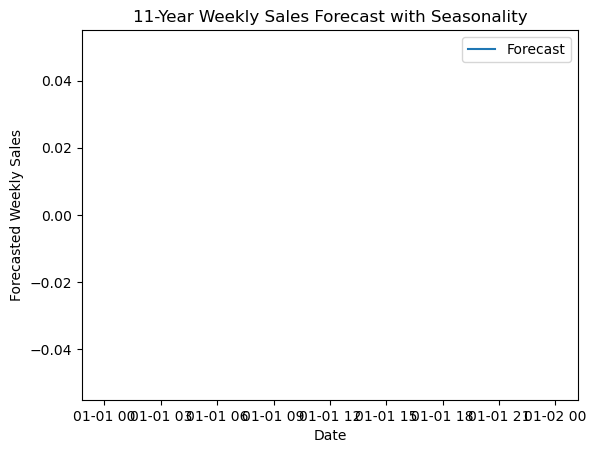

In [218]:
import pandas as pd
from pmdarima import auto_arima
import numpy as np
import matplotlib.pyplot as plt

# Assuming `walmart_sales_agg` is your original time series data

# Step 1: Check for missing values and handle them
print(walmart_sales_agg.isnull().sum())  # Check for NaNs
walmart_sales_agg = walmart_sales_agg.fillna(method='ffill')  # Fill missing values

# Step 2: Apply log transformation to stabilize variance (if necessary)
walmart_sales_agg_log = np.log(walmart_sales_agg + 1)

# Step 3: Fit the seasonal ARIMA model (SARIMA)
model_sarima = auto_arima(walmart_sales_agg_log, seasonal=True, m=52, trace=True, stepwise=True)

# Check if the model fitted correctly
print(model_sarima.summary())

# Step 4: Forecast the next 572 weeks (11 years)
forecast_steps = 572
forecast_log = model_sarima.predict(n_periods=forecast_steps)

# Convert the forecast back to the original scale
forecast_seasonal = np.exp(forecast_log) - 1

# Step 5: Create a date range for the forecasted values (weekly frequency)
future_dates = pd.date_range(start=walmart_sales_agg.index[-1] + pd.Timedelta(weeks=1), periods=forecast_steps, freq='W')

# Step 6: Create a DataFrame for the forecasted sales
forecasted_sales_seasonal = pd.DataFrame(forecast_seasonal, index=future_dates, columns=['Forecasted_Weekly_Sales'])

# Display the first few forecasted sales
print(forecasted_sales_seasonal.head())  # Check for NaNs in the forecast

# Step 7: Plot the forecasted sales
plt.plot(future_dates, forecasted_sales_seasonal['Forecasted_Weekly_Sales'], label='Forecast')
plt.title('11-Year Weekly Sales Forecast with Seasonality')
plt.xlabel('Date')
plt.ylabel('Forecasted Weekly Sales')
plt.legend()
plt.show()


### Prophet

In [394]:
#!pip install prophet


02:11:10 - cmdstanpy - INFO - Chain [1] start processing
02:11:10 - cmdstanpy - INFO - Chain [1] done processing


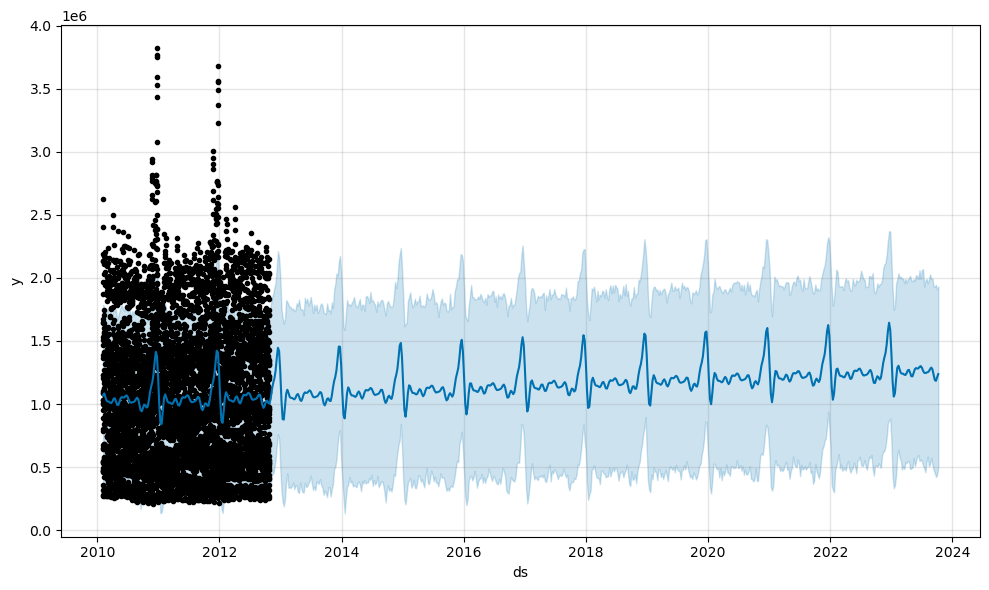

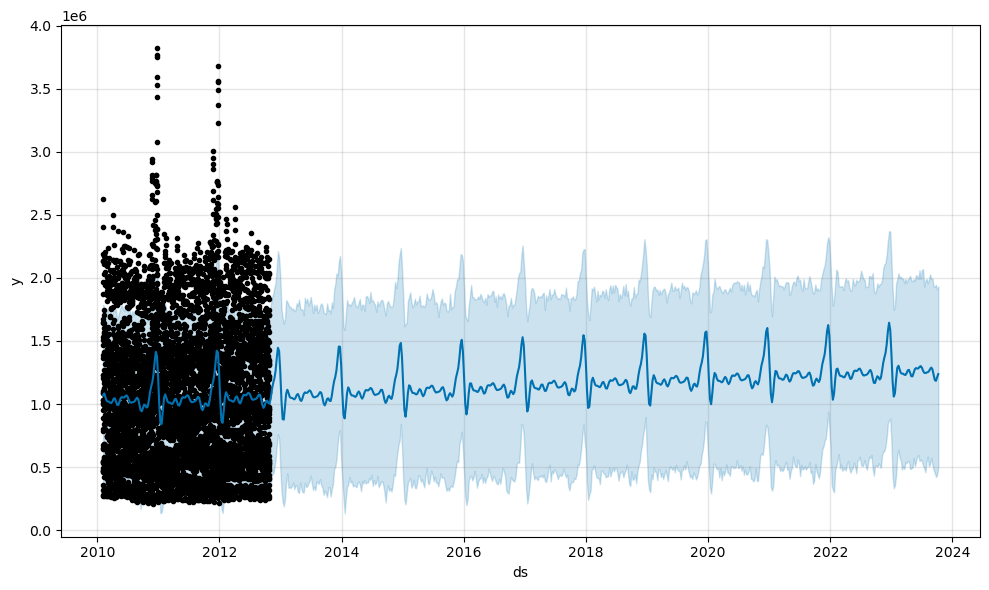

In [393]:
from prophet import Prophet

sales_data = walmart_sales_data['Weekly_Sales'].reset_index()
sales_data.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'}, inplace=True)

model = Prophet()
model.fit(sales_data)

future = model.make_future_dataframe(periods=52 * 11, freq='W')
forecast = model.predict(future)

model.plot(forecast)


In [395]:
# Create a DataFrame for the forecasted sales
forecasted_sales = pd.DataFrame(forecast, index=future_dates, columns=['Forecasted_Weekly_Sales'])

# Display the first few forecasted sales
print(forecasted_sales.head())


            Forecasted_Weekly_Sales
2012-11-04                      NaN
2012-11-11                      NaN
2012-11-18                      NaN
2012-11-25                      NaN
2012-12-02                      NaN
